神經網路感知器

![](https://case.ntu.edu.tw/blog/wp-content/uploads/2016/12/Fig1.png)

# Perceptron  
Perceptron 感知機，我們知道的最簡單和最古老的神經元模型。接收一些輸入，把它們加總，通過激活函數並傳遞到輸出層

In [1]:
import torch
import torch.nn as nn
class Pereptron(nn.Module):
    def _init_(self,input_dim):
        super(Pereptron,self)._init_()
        self.fc1 = nn.Linear(input_dim,1)
    def forward(self,x_in):
        return torch.sigmoid(self.fc1(x_in)).squeeze()


# 激勵函數

## 1. Sigmoid 

+ 為啥要激勵函數  
https://www.zhihu.com/question/22334626

+ 常用的激勵函式
![](https://img-blog.csdnimg.cn/20190325235900792.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM5OTM4NjY2,size_16,color_FFFFFF,t_70)

In [3]:
import torch
import matplotlib.pyplot as plt
def show(a,b):
    plt.plot(a.numpy(),b.numpy())
    plt.show()

D:\Anaconda\envs\nlu\lib\site-packages\ipykernel_launcher.py:2: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  


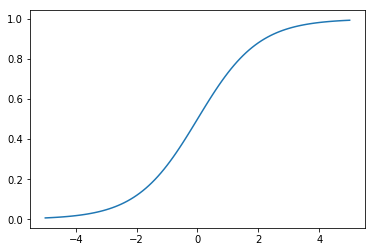

tensor([-5.0000, -4.9000, -4.8000, -4.7000, -4.6000, -4.5000, -4.4000, -4.3000,
        -4.2000, -4.1000, -4.0000, -3.9000, -3.8000, -3.7000, -3.6000, -3.5000,
        -3.4000, -3.3000, -3.2000, -3.1000, -3.0000, -2.9000, -2.8000, -2.7000,
        -2.6000, -2.5000, -2.4000, -2.3000, -2.2000, -2.1000, -2.0000, -1.9000,
        -1.8000, -1.7000, -1.6000, -1.5000, -1.4000, -1.3000, -1.2000, -1.1000,
        -1.0000, -0.9000, -0.8000, -0.7000, -0.6000, -0.5000, -0.4000, -0.3000,
        -0.2000, -0.1000,  0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,
         0.6000,  0.7000,  0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,
         1.4000,  1.5000,  1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,
         2.2000,  2.3000,  2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,
         3.0000,  3.1000,  3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,
         3.8000,  3.9000,  4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,
         4.6000,  4.7000,  4.8000,  4.90

In [4]:

x = torch.range(-5.,5.,0.1)
y = torch.sigmoid(x)
show(x,y)
x

## 2.Tanh 激勵

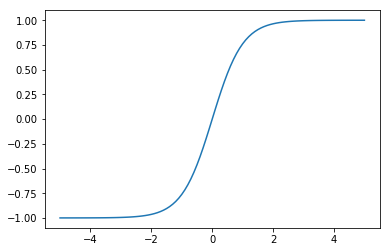

In [5]:
y =  torch.tanh(x)
show(x,y)

## 3. Relu

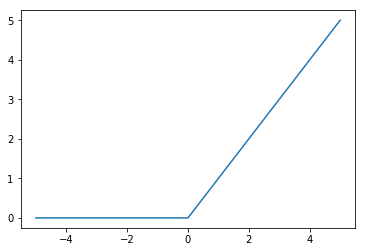

In [6]:
relu = torch.nn.ReLU()
y = relu(x)
show(x,y) 

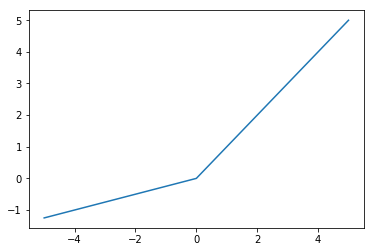

In [8]:
prelu = torch.nn.PReLU(num_parameters=1)
y = prelu(x)
plt.plot(x.numpy(),y.detach().numpy())
plt.show()

+ This is expected behavior because moving to numpy will break the graph and so no gradient will be computed.
+ If you don’t actually need gradients, then you can explicitly .detach() the Tensor that requires grad to get a tensor with the same content that does not require grad. This other Tensor can then be converted to a numpy array.

## 4.softmax

In [15]:
m = torch.nn.Softmax(dim=1)
input = torch.randn(2, 3)
output = m(input)
print(input)
print(output)
print(torch.sum(output,dim=1))

tensor([[ 1.2266,  1.8818,  0.0192],
        [-1.6000,  0.6454,  1.9020]])
tensor([[0.3101, 0.5972, 0.0927],
        [0.0229, 0.2165, 0.7606]])
tensor([1., 1.])


# Lose function

+ 計算lose值
+ MSE = mean squared error


In [2]:
import torch
import torch.nn as nn
mseLoss = nn.MSELoss()
# optional : nn.MSELoss(reduction = 'sum')
outputs = torch.randn(3,5,requires_grad = True)
target = torch.randn(3,5)
loss = mseLoss(outputs,target)
print(loss)


tensor(1.6267, grad_fn=<MseLossBackward>)


# cross entropy
+ https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8-%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-%E5%9F%BA%E7%A4%8E%E4%BB%8B%E7%B4%B9-%E6%90%8D%E5%A4%B1%E5%87%BD%E6%95%B8-loss-function-2dcac5ebb6cb

In [2]:
import torch
import torch.nn as nn
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3,5,requires_grad = True)

target = torch.tensor([1,0,3],dtype=torch.int64)
loss = ce_loss(outputs,target)
print(loss)
print(outputs)
print(target)

tensor(1.3838, grad_fn=<NllLossBackward>)
tensor([[ 0.4151, -0.2473,  0.7832,  0.2306, -0.4923],
        [ 1.2303,  1.6723, -0.9626, -0.1784,  1.6174],
        [-1.6096,  0.1059,  0.0266,  1.6686,  0.5888]], requires_grad=True)
tensor([1, 0, 3])


# Binary cross entropy

In [5]:
import torch
import torch.nn as nn
b_loss = nn.CrossEntropyLoss()
sigmoid = nn.Sigmoid()
outputs = sigmoid(torch.randn(3,5,requires_grad = True))
target = torch.tensor([1,0,3],dtype=torch.int64)
loss = b_loss(outputs,target)
print(loss)
print(outputs)

tensor(1.4832, grad_fn=<NllLossBackward>)
tensor([[0.4215, 0.5952, 0.6719, 0.4009, 0.5155],
        [0.4999, 0.6142, 0.4778, 0.3813, 0.3511],
        [0.2417, 0.5923, 0.2402, 0.7551, 0.4497]], grad_fn=<SigmoidBackward>)
